Conway's Game of Life - マクロな視点から
===
---
カオスの縁へ

## 1. import

In [1]:
import itertools
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt
%matplotlib inline

## 2. ライフゲームの実装
### 2.1. クラスを定義

In [2]:
class GameOfLife():
    """ Conway's Game of Life """
    
    def __init__(self, grid, rule={"survival": [2,3], "birth": [3]}):
        """ Constructor
        - grid: ライフゲームの初期状態を収めたNumpy Array(0: 死, 1: 生)
        - rule: 誕生・生存の条件を定義したdictionary
            -> 各セルの8近傍に生きたセルが何個あれば誕生・生存するか
        """
        self.grid = np.int8(grid)  # grid: 各セルの状態(生死)を保持する
        self.rule = rule
    
    def __iter__(self):
        """ イテレータオブジェクトを返す """
        while True:
            yield self.grid
            self.update()  # セルの状態を更新

    def update(self):
        """ ライフゲームのルールに従って各セルの状態(生死)を更新する """
        new_grid = np.zeros(self.grid.shape, dtype=np.int8)  # 更新後の状態
        n_row, n_col = self.grid.shape
        # すべてのセルについてループ
        for r, c in itertools.product(range(n_row), range(n_col)):
            neighbors = [(r-1, c-1), (r-1, c), (r-1, c+1), 
                         (r,   c-1),           (r,   c+1), 
                         (r+1, c-1), (r+1, c), (r+1, c+1)] # 8近傍のindex
            count = sum([self.grid[i%n_row][j%n_col] for (i, j) in neighbors])  # 近傍の「生」の数
            if count in self.rule["birth"]:
                new_grid[r][c] = 1  # 誕生
            if self.grid[r][c] and (count in self.rule["survival"]):
                new_grid[r][c] = 1  # 生存
        self.grid = new_grid

### 2.2. 動作確認
長寿型として知られるR-pentomino（下図）を初期状態として実行してみる
<img width=40 src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1c/Game_of_life_fpento.svg/1200px-Game_of_life_fpento.svg.png" alt="Game of life fpento.svg">

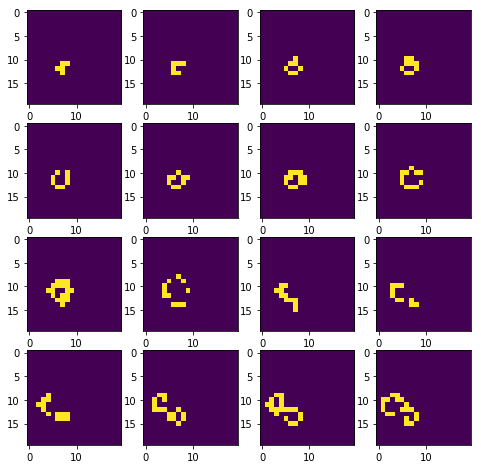

In [3]:
# R_pentominoの配置
R_pentomino = [(2, 1), (1, 2), (2, 2), (3, 2), (1, 3)]
pos_r, pos_c = 10, 5  # offset

# R_pentominoを配置した初期状態
initial_grid = np.zeros((20, 20))
for (i, j) in R_pentomino:
    initial_grid[i+pos_r][j+pos_c] = 1

# ライフゲームの定義
game = GameOfLife(initial_grid)

# 16step描画
fig = plt.figure(figsize=(8, 8))
for step, grid in zip(range(16), game):
    ax = fig.add_subplot(4, 4, step+1)
    ax.imshow(grid)

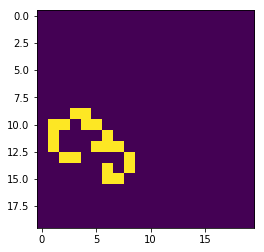

In [4]:
# 以下のようにiter, nextを用いてstepを進めることもできる
game = GameOfLife(initial_grid)

# 16stepの状態をプロット
game_iter = iter(game)
for i in range(16):
    grid = next(game_iter)
plt.imshow(grid)

### 2.3. マクロな傾向
$step = 0$ と $step = 1$ での密度（全セルに対する「生」のセルの割合）の変化を調べる

In [5]:
density_list = []

# 初期密度を0から1まで0.01刻みで変化させる
for density in np.linspace(0, 1, 101):
    game = GameOfLife(random.binomial(1, density, (50, 50)))
    
    for step, grid in zip(range(2), game):
        density_list.append(np.mean(grid))

# cast
density_list = np.array(density_list)

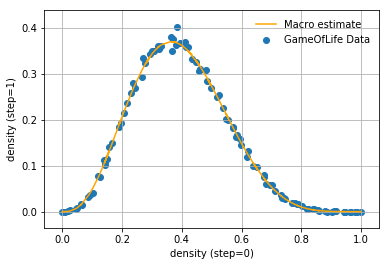

In [6]:
# マクロな理論値
def func(x):
    return 28. * (x**3) * (1-x)**5 * (3-x)

# 実データのプロット
plt.scatter(density_list[::2], density_list[1::2], label="GameOfLife Data")
# 理論値のプロット
plt.plot(density_list[::2], func(density_list[::2]), color="orange", label="Macro estimate")

plt.grid()
plt.legend(loc="upper right", frameon=False)
plt.xlabel("density (step=0)")
plt.ylabel("density (step=1)")